# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/TugasPMDT/dataset_tweet_sentiment_cellular_service_provider.csv')

In [ ]:
df

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


# Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
import re
import numpy as np
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Analisis Data dengan WordCloud

In [ ]:
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

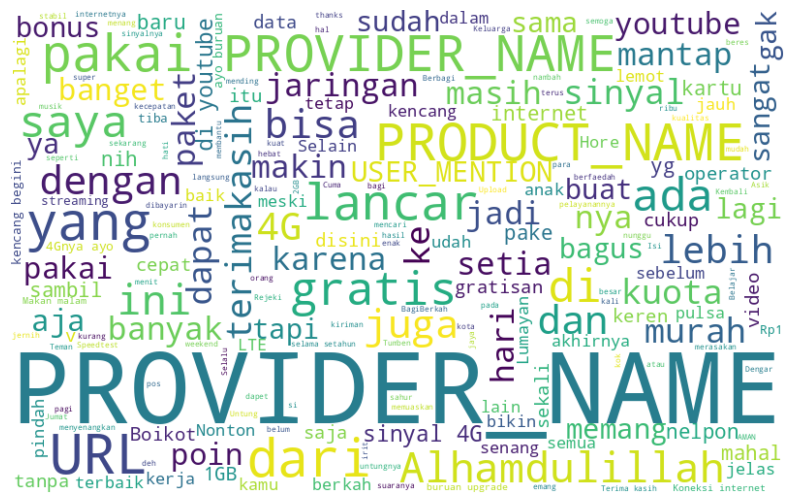

In [ ]:
positive_words = ' '.join(text for text in df['Text Tweet'][df['Sentiment'] == 'positive'])
wordCloud(positive_words)

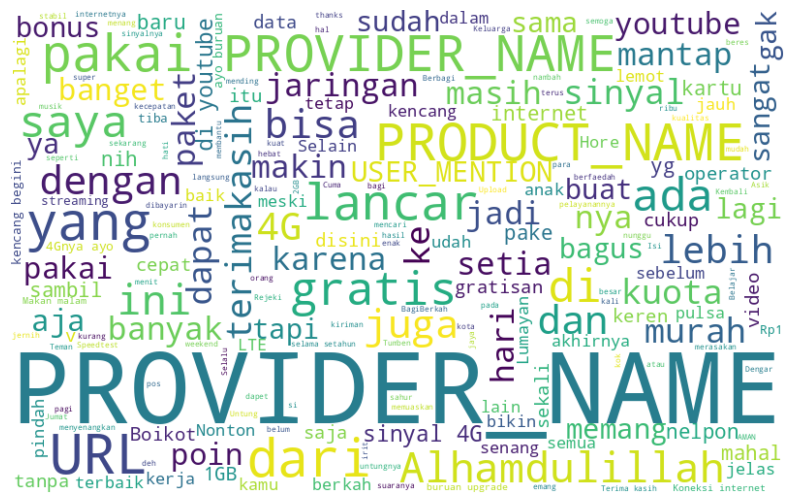

In [ ]:
negative_words = ' '.join(text for text in df['Text Tweet'][df['Sentiment'] == 'positive'])
wordCloud(negative_words)

# Pre-processing

In [ ]:
import nltk
nltk.download("stopwords")
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords = stopwords.words('indonesian')
stopwords.append('boikot_provider_name')
stopwords.append('boikotprovider_name')
stopwords.append('product_name')
stopwords.append('provider_name')
stopwords.append('url')
stopwords.append('user_mention')

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords:
          clean_words.append(word)
  return " ".join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download("punkt")
import demoji

def handle_emoji(text):
    emojis = demoji.findall(text)

    for emoji in emojis:
        text = text.replace(emoji, " " + emojis[emoji].split(":")[0])

    return text

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming
def stemming(text):
  word_tokens = word_tokenize(text)
  stems = [stemmer.stem(word) if word!="jaringan" else word for word in word_tokens ]
  return stems

def text_preprocessing_clean(text):
  text = handle_emoji(text)
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
  text = " ".join(text)
  return text

def text_preprocessing_process(text):
  text = handle_emoji(text)
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
%time
df['clean_teks'] = df['Text Tweet'].apply(text_preprocessing_clean)
df['clean_teks2'] = df['Text Tweet'].apply(text_preprocessing_process)
df

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


,Id,Sentiment,Text Tweet,clean_teks,clean_teks2
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa,"[produk, bangsa]"
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v,"[sakti, alhamdulillah, v]"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...,"[selamat, pagi, bantu, kamar, sinyal, g, hilan..."
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaringan data lot banget h,"[dear, jaringan, data, lot, banget, h]"
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta,"[selamat, malam, dusta]"
...,...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal g lancar lombok timur,"[pantesan, lancar, ya, sinyal, g, lancar, lomb..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai,"[alhamdulillah, lancar, pakai]"
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet lancar ide,"[untung, pakai, internet, lancar, ide]"
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata jaya,"[ramai, lokasi, wisata, jaya]"


In [ ]:
df.to_csv("/content/drive/MyDrive/TugasPMDT/dataset_tweet_sentiment_cellular_cleaned.csv")

In [ ]:
def label(y):
    if y == 'positive':
        return 1
    else:
        return 0

from tqdm import tqdm

tqdm.pandas()

df['Sentiment'] = df.Sentiment.progress_map(label)
df

100%|██████████| 300/300 [00:00<00:00, 179371.52it/s]


,Id,Sentiment,Text Tweet,clean_teks,clean_teks2
0,1,1,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa,"[produk, bangsa]"
1,2,1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v,"[sakti, alhamdulillah, v]"
2,3,0,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...,"[selamat, pagi, bantu, kamar, sinyal, g, hilan..."
3,4,0,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaringan data lot banget h,"[dear, jaringan, data, lot, banget, h]"
4,5,0,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta,"[selamat, malam, dusta]"
...,...,...,...,...,...
295,296,1,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal g lancar lombok timur,"[pantesan, lancar, ya, sinyal, g, lancar, lomb..."
296,297,1,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai,"[alhamdulillah, lancar, pakai]"
297,298,1,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet lancar ide,"[untung, pakai, internet, lancar, ide]"
298,299,1,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata jaya,"[ramai, lokasi, wisata, jaya]"


In [ ]:
df.iloc[297]['Text Tweet']

'Untung pakai internet <PROVIDER_NAME>, lancar, jadi dapat banyak ide.'

In [ ]:
df.Sentiment.value_counts()

0    161
1    139
Name: Sentiment, dtype: int64

# Evaluasi menggunakan Coherence Score

In [ ]:
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint
import seaborn as sns
sns.set()
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

In [ ]:
data_words = df['clean_teks2'].values.tolist()
print(len(data_words))

# Create Dictionary
id2word = corpora.Dictionary(data_words)
id2word.filter_extremes(no_below=2)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

300


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


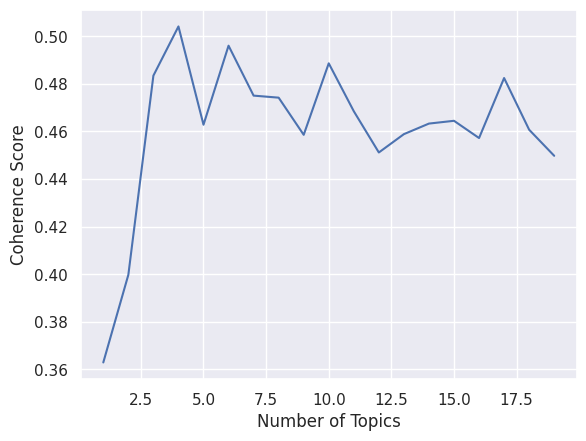

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=i, iterations=100, workers = 4, passes=10, random_state=20)
   cm = CoherenceModel(model=lda_model, texts = data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Latent Dirichlet Allocation

In [ ]:
# View
print(corpus[:1][0][:30])

# number of topics
num_topics = 3
# Build LDA (Latent Dirichlet Allocation) model with 10 Groups
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
print(lda_model)
print(doc_lda)

[(0, 1)]
[(0,
  '0.058*"g" + 0.046*"pakai" + 0.045*"sinyal" + 0.023*"gak" + 0.021*"paket" + '
  '0.020*"internet" + 0.019*"kuota" + 0.016*"aja" + 0.016*"lancar" + '
  '0.015*"jaringan"'),
 (1,
  '0.038*"jaringan" + 0.022*"ya" + 0.019*"ayo" + 0.018*"terimakasih" + '
  '0.017*"ga" + 0.016*"lancar" + 0.013*"gratis" + 0.013*"youtube" + '
  '0.013*"data" + 0.013*"kartu"'),
 (2,
  '0.032*"kuota" + 0.024*"gak" + 0.021*"banget" + 0.020*"pakai" + '
  '0.019*"alhamdulillah" + 0.018*"jaringan" + 0.018*"lot" + 0.016*"gratis" + '
  '0.015*"g" + 0.013*"yg"')]
LdaMulticore<num_terms=259, num_topics=3, decay=0.5, chunksize=2000>


In [ ]:
print(lda_model[corpus[100]])
print(data_words[100])

[(0, 0.04361), (1, 0.909342), (2, 0.04704804)]
['tolong', 'laku', 'reset', 'nomor', 'jaringan', 'lemah', 'makan', 'open', 'page', 'web', 'lot', 'jaringan', 'lte']


In [ ]:
lda_model.save('lda.model')
#lda_model = LdaMulticore.load('lda.model')

Aspects :
1. Internet
2. Kartu
3. Harga

In [ ]:
pip install gensim

In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199775 sha256=eb7113a692541693e440ac3efe4be534b95343747471c8023ede73bd571fd628
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


# FastText

In [ ]:
from gensim.models import FastText

In [ ]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)

CPU times: user 1.02 s, sys: 394 ms, total: 1.42 s
Wall time: 1.61 s


In [ ]:
print(fasttext_model.wv.most_similar("jaring")) #mencari kata terdekat dari kata

[('jaringan', 0.6598390936851501), ('alhamdulillah', 0.2508041560649872), ('ganti', 0.22082889080047607), ('setia', 0.21129487454891205), ('tolong', 0.19966524839401245), ('daerah', 0.19448596239089966), ('bagus', 0.16386201977729797), ('mantap', 0.16327165067195892), ('youtube', 0.15036144852638245), ('banget', 0.1452483832836151)]


In [ ]:
df['clean_teks'][96]='v'
df['clean_teks2'][96]=['v']

<ipython-input-28-1efa1a70a7c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_teks'][96]='v'
<ipython-input-28-1efa1a70a7c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_teks2'][96]=['v']


In [ ]:
len(df['clean_teks'])

300

In [ ]:
fasttext_model = FastText.load("/content/drive/MyDrive/TugasPMDT/FastText-Model-For-ABSA-Cellular-Sentiment.bin")

In [ ]:
print(fasttext_model) # FastText(vocab=2000000, size=50, alpha=0.025)
# cek kata OOV (Out of Vocab)
import numpy as np
term = 'kuota'
if term in fasttext_model.wv.key_to_index:
  print(True)
  print("Kata " + term + " sudah ada di Vocab")
else:
  print(False)
  print("Kata " + term + " belum ada di Vocab")
# simpan vektor awal dari term
old_vect = np.copy(fasttext_model.wv[term])

FastText<vocab=77, vector_size=100, alpha=0.025>
True
Kata kuota sudah ada di Vocab


In [ ]:
fasttext_model.wv.n_similarity("Untung pakai internet <PROVIDER_NAME>, lancar, jadi dapat banyak ide.", "sinyal")

0.5395224

In [ ]:
aspects = ["internet","kartu","harga"]

#compute cosine similarity
def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [ ]:
aspects

['internet', 'kartu', 'harga']

In [ ]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_teks2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 300/300 [00:00<00:00, 1255.44it/s]


In [ ]:
df

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga
0,1,1,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa,"[produk, bangsa]",0,0.342002,0.542368,0.573670
1,2,1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v,"[sakti, alhamdulillah, v]",2,0.197003,0.487908,0.526371
2,3,0,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...,"[selamat, pagi, bantu, kamar, sinyal, g, hilan...",0,0.478570,0.578395,0.653963
3,4,0,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaringan data lot banget h,"[dear, jaringan, data, lot, banget, h]",2,0.575925,0.533655,0.629865
4,5,0,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta,"[selamat, malam, dusta]",2,0.297375,0.560314,0.554651
...,...,...,...,...,...,...,...,...,...
295,296,1,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal g lancar lombok timur,"[pantesan, lancar, ya, sinyal, g, lancar, lomb...",1,0.463640,0.514523,0.572070
296,297,1,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai,"[alhamdulillah, lancar, pakai]",0,0.197157,0.491745,0.670550
297,298,1,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet lancar ide,"[untung, pakai, internet, lancar, ide]",0,0.762905,0.524236,0.439561
298,299,1,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata jaya,"[ramai, lokasi, wisata, jaya]",0,0.253623,0.549332,0.684115


In [ ]:
df[["internet","kartu","harga"]].idxmax(axis=1).value_counts()

harga       124
internet     98
kartu        78
dtype: int64

# Word Embedding

In [ ]:
df['embedding'] = df['clean_teks2'].progress_map(lambda text: fasttext_model.wv.get_sentence_vector(text))

100%|██████████| 300/300 [00:00<00:00, 1261.18it/s]


In [ ]:
df

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,1,1,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa,"[produk, bangsa]",0,0.342002,0.542368,0.573670,"[-0.093121216, -0.005871824, 0.04058466, -0.08..."
1,2,1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v,"[sakti, alhamdulillah, v]",2,0.197003,0.487908,0.526371,"[-0.010474066, -0.029625507, 0.02845735, 0.019..."
2,3,0,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...,"[selamat, pagi, bantu, kamar, sinyal, g, hilan...",0,0.478570,0.578395,0.653963,"[-0.008829288, 0.049347777, 0.0006503521, -0.0..."
3,4,0,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaringan data lot banget h,"[dear, jaringan, data, lot, banget, h]",2,0.575925,0.533655,0.629865,"[-0.07762234, 0.054773927, -0.00564887, -0.048..."
4,5,0,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta,"[selamat, malam, dusta]",2,0.297375,0.560314,0.554651,"[-0.015182349, 0.025511837, 0.020115018, 0.127..."
...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal g lancar lombok timur,"[pantesan, lancar, ya, sinyal, g, lancar, lomb...",1,0.463640,0.514523,0.572070,"[0.03075136, 0.010992549, 0.058980677, 0.03246..."
296,297,1,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai,"[alhamdulillah, lancar, pakai]",0,0.197157,0.491745,0.670550,"[-0.026693404, 0.055001665, 0.07072345, 0.0032..."
297,298,1,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet lancar ide,"[untung, pakai, internet, lancar, ide]",0,0.762905,0.524236,0.439561,"[-0.016338225, 0.058548667, -0.006397444, 0.00..."
298,299,1,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata jaya,"[ramai, lokasi, wisata, jaya]",0,0.253623,0.549332,0.684115,"[0.12592982, 0.016262988, -0.17019974, 0.12716..."


In [ ]:
df.to_csv("/content/drive/MyDrive/TugasPMDT/dataset_tweet_sentiment_cellular_aspects.csv", index = False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TugasPMDT/dataset_tweet_sentiment_cellular_aspects.csv')

In [ ]:
import pandas as pd

# Data per Topik

In [ ]:
df_harga=df.loc[df['topic'] == 0]
df_harga=df_harga.reset_index()
df_harga=df_harga.drop('index', axis=1)
df_harga=df_harga.head(65)
df_harga

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,1,1,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa,"['produk', 'bangsa']",0,0.342002,0.542368,0.573670,[-9.31212157e-02 -5.87182399e-03 4.05846611e-...
1,3,0,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...,"['selamat', 'pagi', 'bantu', 'kamar', 'sinyal'...",0,0.478570,0.578395,0.653963,[-0.00882929 0.04934778 0.00065035 -0.030473...
2,6,0,Untuk penembakan paket dari <PRODUCT_NAME> mas...,tembak paket ganggu ya,"['tembak', 'paket', 'ganggu', 'ya']",0,0.459916,0.602735,0.561796,[-0.00203439 -0.0108756 0.06286646 0.023281...
3,7,1,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",pakai paket nya udah off ganti paket yg gratis...,"['pakai', 'paket', 'nya', 'udah', 'off', 'gant...",0,0.532616,0.538208,0.524146,[-7.33417720e-02 9.25638899e-03 9.16292984e-...
4,9,0,keluhan gak ditanggapi. bikin emosi aja. pulsa...,keluh gak tanggap bikin emosi aja pulsa curi s...,"['keluh', 'gak', 'tanggap', 'bikin', 'emosi', ...",0,0.386398,0.558395,0.532621,[-0.00730132 -0.04380681 0.01566527 -0.025021...
...,...,...,...,...,...,...,...,...,...,...
60,116,1,Asik juga kencang begini <PROVIDER_NAME>,asik kencang,"['asik', 'kencang']",0,0.524935,0.389138,0.493380,[ 7.68514425e-02 -4.54075374e-02 -1.42877121e-...
61,119,1,Dapat bonus kuota 2GB dan 100 menit nelpon ke ...,bonus kuota gb menit nelpon operator,"['bonus', 'kuota', 'gb', 'menit', 'nelpon', 'o...",0,0.597359,0.461535,0.326920,[ 4.39559435e-03 -1.92877222e-02 4.81673963e-...
62,120,1,Kuota masih AMAN <PROVIDER_NAME> #capture #kuo...,kuota aman capture kuotaaman kota mamuju,"['kuota', 'aman', 'capture', 'kuotaaman', 'kot...",0,0.332099,0.745483,0.578335,[ 0.05158933 -0.01071354 -0.07372278 0.031182...
63,121,1,Masih ada yang hemat <PROVIDER_NAME>,hemat,['hemat'],0,0.448917,0.520073,0.645483,[-0.0150411 -0.02515587 0.05131638 -0.072894...


In [ ]:
df_test_harga=df_harga.tail(85)
df_test_harga=df_test_harga.reset_index()
df_test_harga=df_test_harga.drop('index', axis=1)
df_test_harga

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,1,1,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,produk bangsa,"['produk', 'bangsa']",0,0.342002,0.542368,0.573670,[-9.31212157e-02 -5.87182399e-03 4.05846611e-...
1,3,0,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bantu kamar sinyal g hilang pangg...,"['selamat', 'pagi', 'bantu', 'kamar', 'sinyal'...",0,0.478570,0.578395,0.653963,[-0.00882929 0.04934778 0.00065035 -0.030473...
2,6,0,Untuk penembakan paket dari <PRODUCT_NAME> mas...,tembak paket ganggu ya,"['tembak', 'paket', 'ganggu', 'ya']",0,0.459916,0.602735,0.561796,[-0.00203439 -0.0108756 0.06286646 0.023281...
3,7,1,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",pakai paket nya udah off ganti paket yg gratis...,"['pakai', 'paket', 'nya', 'udah', 'off', 'gant...",0,0.532616,0.538208,0.524146,[-7.33417720e-02 9.25638899e-03 9.16292984e-...
4,9,0,keluhan gak ditanggapi. bikin emosi aja. pulsa...,keluh gak tanggap bikin emosi aja pulsa curi s...,"['keluh', 'gak', 'tanggap', 'bikin', 'emosi', ...",0,0.386398,0.558395,0.532621,[-0.00730132 -0.04380681 0.01566527 -0.025021...
...,...,...,...,...,...,...,...,...,...,...
60,116,1,Asik juga kencang begini <PROVIDER_NAME>,asik kencang,"['asik', 'kencang']",0,0.524935,0.389138,0.493380,[ 7.68514425e-02 -4.54075374e-02 -1.42877121e-...
61,119,1,Dapat bonus kuota 2GB dan 100 menit nelpon ke ...,bonus kuota gb menit nelpon operator,"['bonus', 'kuota', 'gb', 'menit', 'nelpon', 'o...",0,0.597359,0.461535,0.326920,[ 4.39559435e-03 -1.92877222e-02 4.81673963e-...
62,120,1,Kuota masih AMAN <PROVIDER_NAME> #capture #kuo...,kuota aman capture kuotaaman kota mamuju,"['kuota', 'aman', 'capture', 'kuotaaman', 'kot...",0,0.332099,0.745483,0.578335,[ 0.05158933 -0.01071354 -0.07372278 0.031182...
63,121,1,Masih ada yang hemat <PROVIDER_NAME>,hemat,['hemat'],0,0.448917,0.520073,0.645483,[-0.0150411 -0.02515587 0.05131638 -0.072894...


In [ ]:
df_internet=df.loc[df['topic'] == 2]
df_internet=df_internet.reset_index()
df_internet=df_internet.drop('index', axis=1)
df_internet=df_internet.head(65)
df_internet

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,2,1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v,"['sakti', 'alhamdulillah', 'v']",2,0.197003,0.487908,0.526371,[-0.01047407 -0.02962551 0.02845735 0.019609...
1,4,0,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaringan data lot banget h,"['dear', 'jaringan', 'data', 'lot', 'banget', ...",2,0.575925,0.533655,0.629865,[-0.07762234 0.05477393 -0.00564887 -0.048411...
2,5,0,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta,"['selamat', 'malam', 'dusta']",2,0.297375,0.560314,0.554651,[-0.01518235 0.02551184 0.02011502 0.127143...
3,23,1,Jadi stabil disini. <PROVIDER_NAME> <URL>,stabil,['stabil'],2,0.388731,0.391578,0.319472,[ 0.17931032 0.18957192 -0.15781927 0.030249...
4,30,0,cepat banget data <PROVIDER_NAME> habis <URL>,cepat banget data habis,"['cepat', 'banget', 'data', 'habis']",2,0.533561,0.533586,0.637741,[-7.49764144e-02 1.33873187e-02 8.24369490e-...
...,...,...,...,...,...,...,...,...,...,...
60,249,1,Alhamdulillah Kuota <PROVIDER_NAME> banyak yan...,alhamdulillah kuota murah,"['alhamdulillah', 'kuota', 'murah']",2,0.129641,0.617640,0.611790,[-2.65611019e-02 -3.82529385e-02 5.64175732e-...
61,251,0,"<PROVIDER_NAME> Pulsanya masih ada, TM masih b...",pulsa tm nelpon simpati pulsa gak kampret,"['pulsa', 'tm', 'nelpon', 'simpati', 'pulsa', ...",2,0.468380,0.549230,0.460521,[ 0.02236154 -0.00759234 0.01498502 -0.008961...
62,261,0,Signal <PROVIDER_NAME> Mentari makin lama maki...,signal mentari prihatin pikir ganti kartu kecewa,"['signal', 'mentari', 'prihatin', 'pikir', 'ga...",2,0.664348,0.625817,0.578380,[-5.23624793e-02 -4.24950533e-02 5.08393981e-...
63,264,0,tai <PROVIDER_NAME>,tai,['tai'],2,0.451523,0.563946,0.492816,[-5.34510612e-03 1.20053910e-01 -1.08887628e-...


In [ ]:
df_test_internet=df_internet.tail(7)
df_test_internet=df_test_internet.reset_index()
df_test_internet=df_test_internet.drop('index', axis=1)
df_test_internet

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,237,1,Hari minggu masuk kerja tapi gak ada yang dike...,minggu masuk kerja gak dikerjain ujung cari la...,"['minggu', 'masuk', 'kerja', 'gak', 'dikerjain...",2,0.492034,0.571460,0.467504,[-0.00647703 -0.01454509 0.04551694 -0.010388...
1,248,0,#Boikot<PROVIDER_NAME>..saatnya hijrah ke ..se...,boikotprovider namesaatnya hijrah selamat tinggal,"['boikotprovider namesaatnya', 'hijrah', 'sela...",2,0.582452,0.582767,0.699698,[-0.00347921 0.04069386 0.00940865 -0.014274...
2,249,1,Alhamdulillah Kuota <PROVIDER_NAME> banyak yan...,alhamdulillah kuota murah,"['alhamdulillah', 'kuota', 'murah']",2,0.129641,0.617640,0.611790,[-2.65611019e-02 -3.82529385e-02 5.64175732e-...
3,251,0,"<PROVIDER_NAME> Pulsanya masih ada, TM masih b...",pulsa tm nelpon simpati pulsa gak kampret,"['pulsa', 'tm', 'nelpon', 'simpati', 'pulsa', ...",2,0.468380,0.549230,0.460521,[ 0.02236154 -0.00759234 0.01498502 -0.008961...
4,261,0,Signal <PROVIDER_NAME> Mentari makin lama maki...,signal mentari prihatin pikir ganti kartu kecewa,"['signal', 'mentari', 'prihatin', 'pikir', 'ga...",2,0.664348,0.625817,0.578380,[-5.23624793e-02 -4.24950533e-02 5.08393981e-...
5,264,0,tai <PROVIDER_NAME>,tai,['tai'],2,0.451523,0.563946,0.492816,[-5.34510612e-03 1.20053910e-01 -1.08887628e-...
6,267,0,<PROVIDER_NAME> Hooq sangat tidak bermanfaat. ...,hooq manfaat beli kuota tonton youtube gak hoo...,"['hooq', 'manfaat', 'beli', 'kuota', 'tonton',...",2,0.334756,0.578655,0.403691,[ 0.02411554 -0.04242958 0.00991744 -0.056631...


In [ ]:
df_kartu=df.loc[df['topic'] == 1]
df_kartu=df_kartu.reset_index()
df_kartu=df_kartu.drop('index', axis=1)
df_kartu=df_kartu.head(65)
df_kartu

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,8,0,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,rt kamus perhapean,"['rt', 'kamus', 'perhapean']",1,0.522914,0.653685,0.700194,[-0.05067776 0.04704976 0.0200108 -0.036101...
1,10,0,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,bilboard iklan pesan sembunyi ramadhan,"['bilboard', 'iklan', 'pesan', 'sembunyi', 'ra...",1,0.513041,0.407101,0.544014,[-0.08191718 -0.05866637 0.04201521 0.015228...
2,11,0,"<PROVIDER_NAME> mampus!!!!! bulan puasa, subuh...",mampus puasa subuh sahur cek pulsa sedot sisa ...,"['mampus', 'puasa', 'subuh', 'sahur', 'cek', '...",1,0.318692,0.542980,0.484709,[ 5.5812327e-03 -2.2311376e-02 -1.7105358e-02 ...
3,13,0,"Setuju, <USER_MENTION> silahkan boikot saja pe...",tuju silah boikot langgan dukung hrs,"['tuju', 'silah', 'boikot', 'langgan', 'dukung...",1,0.412825,0.527870,0.380028,[-1.6824314e-02 -3.7082031e-02 -7.6395012e-02 ...
4,16,0,#internetlelet <PROVIDER_NAME> ga sesuai iklan,internetlelet ga sesuai iklan,"['internetlelet', 'ga', 'sesuai', 'iklan']",1,0.763051,0.418311,0.345733,[ 0.00088013 -0.03544427 -0.01725887 -0.051953...
...,...,...,...,...,...,...,...,...,...,...
60,243,1,"Kadang, saya juga cari referensi di youtube ya...",kadang cari referensi youtube gudang informasi...,"['kadang', 'cari', 'referensi', 'youtube', 'gu...",1,0.619990,0.569034,0.515154,[ 6.3511394e-02 -4.5303356e-02 1.1846557e-02 ...
61,244,1,belajar mengedit video di youtube jadi enak da...,ajar edit video youtube enak cepat paham kalo ...,"['ajar', 'edit', 'video', 'youtube', 'enak', '...",1,0.531935,0.531106,0.595026,[-3.5568018e-02 -3.4745153e-02 2.0698452e-02 ...
62,247,0,Ayo yang masih pakai kartu <PROVIDER_NAME> Seg...,ayo pakai kartu buang got ya,"['ayo', 'pakai', 'kartu', 'buang', 'got', 'ya']",1,0.286899,0.637189,0.596106,[-0.03451463 0.02568684 0.01576666 0.075509...
63,250,0,"Sudah tarifnya paling mahal, ditambah jaringan...",tarif mahal tambah jaringan susah kesal banget,"['tarif', 'mahal', 'tambah', 'jaringan', 'susa...",1,0.470107,0.599445,0.738172,[-0.08503477 -0.01657024 -0.01954768 -0.075209...


In [ ]:
df_test_kartu=df_kartu.tail(13)
df_test_kartu=df_test_kartu.reset_index()
df_test_kartu=df_test_kartu.drop('index', axis=1)
df_test_kartu

,Id,Sentiment,Text Tweet,clean_teks,clean_teks2,topic,internet,kartu,harga,embedding
0,216,0,RT <USER_MENTION>: Belum ada permintaan maaf d...,rt minta maaf nyata apa boikot,"['rt', 'minta', 'maaf', 'nyata', 'apa', 'boikot']",1,0.416320,0.638817,0.629014,[-0.01731949 0.04636474 0.01716457 0.045910...
1,218,0,RT <USER_MENTION>: <PROVIDER_NAME> ini <PROVID...,rt jaringan g nya penuh ga konek internet,"['rt', 'jaringan', 'g', 'nya', 'penuh', 'ga', ...",1,0.699645,0.449748,0.448760,[-0.04611489 0.03828802 0.0152698 -0.002361...
2,227,0,Data yang sama sekali tidak ada manfaatnya. <...,data manfaat,"['data', 'manfaat']",1,0.350971,0.597152,0.711855,[-2.51066741e-02 7.61458604e-03 -2.76267529e-...
3,230,0,Sudah mahal sinyalnya jelek lagi... <PROVIDER_...,mahal sinyal jelek bangsat anjing,"['mahal', 'sinyal', 'jelek', 'bangsat', 'anjing']",1,0.516316,0.342496,0.512080,[ 3.2557089e-02 7.6876409e-02 -4.5655601e-02 ...
4,231,0,Jeleknya jaringan internet. <PROVIDER_NAME>,jelek jaringan internet,"['jelek', 'jaringan', 'internet']",1,0.844488,0.373313,0.360132,[ 0.0077174 0.07487324 -0.03937986 -0.049840...
5,232,0,Cuma di area Pandeglang kota.. jaringan <PROVI...,area pandeglang kota jaringan buruk jelek jadi...,"['area', 'pandeglang', 'kota', 'jaringan', 'bu...",1,0.540804,0.526670,0.620851,[-2.22633798e-02 6.07082695e-02 3.73328337e-...
6,234,1,<PROVIDER_NAME> ayo kamu bisa,ayo,['ayo'],1,-0.086628,0.185242,0.457789,[ 7.17264488e-02 1.25823215e-01 -6.80596381e-...
7,235,1,Mending ngopi nyantai sambil dengar musik klas...,mending ngopi nyantai dengar musik klasik yout...,"['mending', 'ngopi', 'nyantai', 'dengar', 'mus...",1,0.660711,0.451447,0.422402,[-0.04473092 -0.03103923 0.02321544 -0.038609...
8,243,1,"Kadang, saya juga cari referensi di youtube ya...",kadang cari referensi youtube gudang informasi...,"['kadang', 'cari', 'referensi', 'youtube', 'gu...",1,0.619990,0.569034,0.515154,[ 6.3511394e-02 -4.5303356e-02 1.1846557e-02 ...
9,244,1,belajar mengedit video di youtube jadi enak da...,ajar edit video youtube enak cepat paham kalo ...,"['ajar', 'edit', 'video', 'youtube', 'enak', '...",1,0.531935,0.531106,0.595026,[-3.5568018e-02 -3.4745153e-02 2.0698452e-02 ...


# LSTM Model

In [ ]:
fasttext_model.wv.get_sentence_vector(df_kartu['clean_teks2'][4])

array([-0.02121643, -0.02303123, -0.03211288,  0.04529917,  0.02593867,
        0.00254184, -0.00646535,  0.02991309, -0.02620737,  0.03126276,
        0.0013984 , -0.01202823,  0.00836634, -0.04589669,  0.0201927 ,
       -0.01886187,  0.01351921,  0.01268067, -0.03194559, -0.00057864,
       -0.022617  ,  0.05153545,  0.02226407,  0.07312058,  0.00180436,
       -0.01289391, -0.07651411, -0.01315819,  0.01265025, -0.02730577,
       -0.03358496, -0.01189016,  0.07242637, -0.01603458,  0.02523963,
        0.02197785,  0.04547369,  0.02607109, -0.01326651,  0.02642273,
       -0.03123074,  0.01759145, -0.02649949,  0.03480103, -0.01852672,
        0.02275286, -0.02823424,  0.02170723, -0.00359639,  0.0027077 ,
       -0.00197715,  0.06438718, -0.02266883, -0.03649976,  0.01752276,
       -0.01376553, -0.02123841, -0.0298158 , -0.03221728,  0.06131535,
        0.03479839, -0.05514909,  0.04370393, -0.02860458, -0.02388657,
        0.03035684,  0.02588607,  0.01437222, -0.02335555, -0.05

In [ ]:
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, GlobalMaxPool1D, InputLayer, Embedding
model_kartu = Sequential()

# Instead of embedding layer, use custom function to feed pre-trained vectors
model_kartu.add(InputLayer(input_shape=(None, 100)))

# Add LSTM and other layers
model_kartu.add(LSTM(100, return_sequences=True))
model_kartu.add(GlobalMaxPool1D())
model_kartu.add(Dropout(0.3))
model_kartu.add(Dense(50, activation='relu'))
model_kartu.add(Dropout(0.3))
model_kartu.add(Dense(1, activation='sigmoid'))

print(model_kartu.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 100)         80400     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

In [ ]:
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, GlobalMaxPool1D, InputLayer, Embedding
model_internet = Sequential()

# Instead of embedding layer, use custom function to feed pre-trained vectors
model_internet.add(InputLayer(input_shape=(None, 100)))

# Add LSTM and other layers
model_internet.add(LSTM(100, return_sequences=True))
model_internet.add(GlobalMaxPool1D())
model_internet.add(Dropout(0.3))
model_internet.add(Dense(50, activation='relu'))
model_internet.add(Dropout(0.3))
model_internet.add(Dense(1, activation='sigmoid'))

print(model_internet.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 100)         80400     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [ ]:
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, GlobalMaxPool1D, InputLayer, Embedding
model_harga = Sequential()

# Instead of embedding layer, use custom function to feed pre-trained vectors
model_harga.add(InputLayer(input_shape=(None, 100)))

# Add LSTM and other layers
model_harga.add(LSTM(100, return_sequences=True))
model_harga.add(GlobalMaxPool1D())
model_harga.add(Dropout(0.3))
model_harga.add(Dense(50, activation='relu'))
model_harga.add(Dropout(0.3))
model_harga.add(Dense(1, activation='sigmoid'))

print(model_harga.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 100)         80400     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                      

In [ ]:
# Define a function to convert sentences to fasttext vectors
def get_fasttext_vector(sentence):
  words = sentence.split()
  if isinstance(words, str):
    # If it's a single sentence, use get_sentence_vector
    word_vectors = fasttext_model.wv.get_sentence_vector(words)
  else:
    # If it's a list of words, iterate and call get_vecattr
    word_vectors = []
  if word_vectors:
    return word_vectors
  else:
    # If sentence has no known words, return zero vector
    return np.zeros((100))

In [ ]:
!pip install SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.utils import resample

In [ ]:
data_majority = df_kartu[df_kartu['Sentiment'] == 0]
data_minority = df_kartu[df_kartu['Sentiment'] == 1]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled_kartu = pd.concat([data_majority, data_minority_upsampled])

majority class before upsample: (37, 10)
minority class before upsample: (28, 10)


In [ ]:
data_majority2 = df_internet[df_internet['Sentiment'] == 0]
data_minority2 = df_internet[df_internet['Sentiment'] == 1]

print("majority class before upsample:",data_majority2.shape)
print("minority class before upsample:",data_minority2.shape)

# Upsample minority class
data_minority_upsampled2 = resample(data_minority2,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority2.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled_internet = pd.concat([data_majority2, data_minority_upsampled2])

majority class before upsample: (33, 10)
minority class before upsample: (32, 10)


In [ ]:
data_majority3 = df_harga[df_harga['Sentiment'] == 0]
data_minority3 = df_harga[df_harga['Sentiment'] == 1]

print("majority class before upsample:",data_majority3.shape)
print("minority class before upsample:",data_minority3.shape)

# Upsample minority class
data_minority_upsampled3 = resample(data_minority3,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority3.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled_harga = pd.concat([data_majority3, data_minority_upsampled3])

majority class before upsample: (40, 10)
minority class before upsample: (25, 10)


In [ ]:
data_upsampled_kartu.shape

(74, 10)

In [ ]:
data_upsampled_internet.shape

(66, 10)

In [ ]:
data_upsampled_harga.shape

(80, 10)

In [ ]:
# train_vector = df_kartu['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
# train_label = df_kartu['Sentiment']
train_vector_kartu = data_upsampled_kartu['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
train_label_kartu = data_upsampled_kartu['Sentiment']

In [ ]:
train_vector_internet = data_upsampled_internet['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
train_label_internet = data_upsampled_internet['Sentiment']

In [ ]:
train_vector_harga = data_upsampled_harga['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
train_label_harga = data_upsampled_harga['Sentiment']

In [ ]:
test_vector_kartu = df_test_kartu['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
test_label_kartu = df_test_kartu['Sentiment']
test_vector_internet = df_test_internet['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
test_label_internet = df_test_internet['Sentiment']
test_vector_harga = df_test_harga['clean_teks2'].apply(lambda words: fasttext_model.wv.get_sentence_vector(words))
test_label_harga = df_test_harga['Sentiment']

In [ ]:
train_vector_kartu = np.stack(train_vector_kartu)
train_vector_internet = np.stack(train_vector_internet)
train_vector_harga = np.stack(train_vector_harga)

In [ ]:
test_vector_kartu = np.stack(test_vector_kartu)
test_vector_internet = np.stack(test_vector_internet)
test_vector_harga = np.stack(test_vector_harga)

In [ ]:
# oversample = SMOTE()
# train_vector, train_label = oversample.fit_resample(train_vector, train_label)

In [ ]:
train_vector_kartu = np.expand_dims(train_vector_kartu, axis=1)
train_vector_internet = np.expand_dims(train_vector_internet, axis=1)
train_vector_harga = np.expand_dims(train_vector_harga, axis=1)

In [ ]:
test_vector_kartu = np.expand_dims(test_vector_kartu, axis=1)
test_vector_internet = np.expand_dims(test_vector_internet, axis=1)
test_vector_harga = np.expand_dims(test_vector_harga, axis=1)

In [ ]:
from tensorflow import convert_to_tensor

In [ ]:
train_vector_kartu = convert_to_tensor(train_vector_kartu)
train_vector_internet = convert_to_tensor(train_vector_internet)
train_vector_harga = convert_to_tensor(train_vector_harga)

In [ ]:
test_vector_kartu = convert_to_tensor(test_vector_kartu)
test_vector_internet = convert_to_tensor(test_vector_internet)
test_vector_harga = convert_to_tensor(test_vector_harga)

In [ ]:
train_vector_kartu.shape

(74, 100)

In [ ]:
test_vector_internet.shape

(7, 100)

In [ ]:
train_label_kartu.shape

(74,)

In [ ]:
test_label_internet.shape

(7,)

In [ ]:
# test_sentence = "terimakasih lo"
# test_vector = fasttext_model.wv.get_sentence_vector(test_sentence.split())

In [ ]:
#test_vector = convert_to_tensor(test_vector)

In [ ]:
# Compile and train your model
model_kartu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_kartu.fit(train_vector_kartu, train_label_kartu, epochs=50, batch_size=16)

Epoch 1/30
5/5 [==============================] - 5s 9ms/step - loss: 0.6530 - accuracy: 0.7162
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.7027
Epoch 3/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6508 - accuracy: 0.6892
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 0.6453 - accuracy: 0.7162
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6447 - accuracy: 0.6622
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6455 - accuracy: 0.6892
Epoch 7/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6245 - accuracy: 0.7162
Epoch 8/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.6892
Epoch 9/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6269 - accuracy: 0.7162
Epoch 10/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6188 - accuracy: 0.6757
Epoch 11/30
5/5 [======================

In [ ]:
# Compile and train your model
model_internet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_internet.fit(train_vector_internet, train_label_internet, epochs=50, batch_size=16)

Epoch 1/30
5/5 [==============================] - 4s 5ms/step - loss: 0.6282 - accuracy: 0.6364
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6970
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6190 - accuracy: 0.7273
Epoch 4/30
5/5 [==============================] - 0s 6ms/step - loss: 0.6208 - accuracy: 0.7121
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.7576
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6156 - accuracy: 0.7576
Epoch 7/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 8/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6067 - accuracy: 0.6970
Epoch 9/30
5/5 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.7273
Epoch 10/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6046 - accuracy: 0.6818
Epoch 11/30
5/5 [======================

In [ ]:
# Compile and train your model
model_harga.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_harga.fit(train_vector_harga, train_label_harga, epochs=50, batch_size=16)

Epoch 1/30
5/5 [==============================] - 2s 6ms/step - loss: 0.5848 - accuracy: 0.6875
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5586 - accuracy: 0.7250
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5613 - accuracy: 0.7125
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.7500
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5598 - accuracy: 0.7000
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7125
Epoch 7/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7125
Epoch 8/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.7500
Epoch 9/30
5/5 [==============================] - 0s 7ms/step - loss: 0.5490 - accuracy: 0.7375
Epoch 10/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.7250
Epoch 11/30
5/5 [======================

In [ ]:
model_kartu.predict(test_vector_kartu)

1/1 [==============================] - 0s 22ms/step


array([[0.3213772 ],
       [0.16250242],
       [0.28993344],
       [0.2651113 ],
       [0.14145933],
       [0.35602257],
       [0.6287652 ],
       [0.4958589 ],
       [0.45034084],
       [0.23674518],
       [0.3758456 ],
       [0.47238848],
       [0.34304014]], dtype=float32)

In [ ]:
model_kartu.evaluate(test_vector_kartu,test_label_kartu)

1/1 [==============================] - 0s 36ms/step - loss: 0.5187 - accuracy: 0.7692


[0.5186876654624939, 0.7692307829856873]

In [ ]:
from sklearn.metrics import classification_report
print("Dataset Aspek Kartu")
y_pred = model_kartu.predict(test_vector_kartu)
y_pred_bool = np.round(y_pred)

print("\nKartu Aspect")
print(classification_report(test_label_kartu, y_pred_bool))
report_kartu1=classification_report(test_label_kartu, y_pred_bool)

y_pred = model_internet.predict(test_vector_kartu)
y_pred_bool = np.round(y_pred)

print("\nInternet Aspect")
print(classification_report(test_label_kartu, y_pred_bool))
report_internet1=classification_report(test_label_kartu, y_pred_bool)

y_pred = model_harga.predict(test_vector_kartu)
y_pred_bool = np.round(y_pred)

print("\nHarga Aspect")
print(classification_report(test_label_kartu, y_pred_bool))
report_harga1=classification_report(test_label_kartu, y_pred_bool)

Dataset Aspek Kartu
1/1 [==============================] - 0s 101ms/step

Kartu Aspect
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.25      0.40         4

    accuracy                           0.77        13
   macro avg       0.88      0.62      0.63        13
weighted avg       0.83      0.77      0.72        13

1/1 [==============================] - 0s 56ms/step

Internet Aspect
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.29      0.50      0.36         4

    accuracy                           0.46        13
   macro avg       0.48      0.47      0.45        13
weighted avg       0.55      0.46      0.48        13

1/1 [==============================] - 0s 72ms/step

Harga Aspect
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1   

In [ ]:
from sklearn.metrics import classification_report

print("Dataset Aspek Internet")
y_pred = model_kartu.predict(test_vector_internet)
y_pred_bool = np.round(y_pred)

print("\nKartu Aspect")
print(classification_report(test_label_internet, y_pred_bool))
report_kartu2=classification_report(test_label_internet, y_pred_bool)

y_pred = model_internet.predict(test_vector_internet)
y_pred_bool = np.round(y_pred)

print("\nInternet Aspect")
print(classification_report(test_label_internet, y_pred_bool))
report_internet2=classification_report(test_label_internet, y_pred_bool)

y_pred = model_harga.predict(test_vector_internet)
y_pred_bool = np.round(y_pred)

print("\nHarga Aspect")
print(classification_report(test_label_internet, y_pred_bool))
report_harga2=classification_report(test_label_internet, y_pred_bool)

Dataset Aspek Internet
1/1 [==============================] - 0s 34ms/step

Kartu Aspect
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.33      1.00      0.50         2

    accuracy                           0.43         7
   macro avg       0.67      0.60      0.42         7
weighted avg       0.81      0.43      0.38         7

1/1 [==============================] - 0s 79ms/step

Internet Aspect
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

1/1 [==============================] - 0s 92ms/step

Harga Aspect
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1 

In [ ]:
from sklearn.metrics import classification_report

print("Dataset Aspek Harga")
y_pred = model_kartu.predict(test_vector_harga)
y_pred_bool = np.round(y_pred)

print("\nKartu Aspect")
print(classification_report(test_label_harga, y_pred_bool))
report_kartu3=classification_report(test_label_harga, y_pred_bool)

y_pred = model_internet.predict(test_vector_harga)
y_pred_bool = np.round(y_pred)

print("\nInternet Aspect")
print(classification_report(test_label_harga, y_pred_bool))
report_internet3=classification_report(test_label_harga, y_pred_bool)

y_pred = model_harga.predict(test_vector_harga)
y_pred_bool = np.round(y_pred)

print("\nHarga Aspect")
print(classification_report(test_label_harga, y_pred_bool))
report_harga3=classification_report(test_label_harga, y_pred_bool)

Dataset Aspek Harga
3/3 [==============================] - 0s 6ms/step

Kartu Aspect
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        40
           1       0.61      0.68      0.64        25

    accuracy                           0.71        65
   macro avg       0.70      0.70      0.70        65
weighted avg       0.72      0.71      0.71        65

3/3 [==============================] - 0s 7ms/step

Internet Aspect
              precision    recall  f1-score   support

           0       0.70      0.53      0.60        40
           1       0.46      0.64      0.53        25

    accuracy                           0.57        65
   macro avg       0.58      0.58      0.57        65
weighted avg       0.61      0.57      0.57        65

3/3 [==============================] - 0s 8ms/step

Harga Aspect
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        40
           1       

In [ ]:
from functools import reduce
def report_average(*args):
  report_list = list()
  for report in args:
      splited = [' '.join(x.split()) for x in report.split('\n\n')]
      header = [x for x in splited[0].split(' ')]
      data = np.array(splited[1].split(' ')).reshape(-1, len(header) + 1)
      data = np.delete(data, 0, 1).astype(float)
      rest = splited[2].split(' ')
      accuarcy =np.array([0, 0, rest[1], rest[2]]).astype(float).reshape(-1, len(header))
      macro_avg = np.array([rest[5:9]]).astype(float).reshape(-1, len(header))
      weighted_avg = np.array([rest[11:]]).astype(float).reshape(-1, len(header))
      #avg_total = np.array([x for x in avg]).astype(float).reshape(-1, len(header))
      df = pd.DataFrame(np.concatenate((data, accuarcy,macro_avg,weighted_avg)), columns=header)
      report_list.append(df)
  res = reduce(lambda x, y: x.add(y, fill_value=0), report_list) / len(report_list)
  return res.rename(index={res.index[-3]: 'accuracy',res.index[-2]: 'macro_avg',res.index[-1]: 'weighted_avg'})

In [ ]:
report_average_kartu  = report_average(report_kartu1, report_kartu2, report_kartu3)
print(report_average_kartu)

In [ ]:
report_average_internet  = report_average(report_internet1, report_internet2, report_internet3)
print(report_average_internet)

              precision    recall  f1-score  support
0              0.833333  0.400000  0.506667      5.0
1              0.276667  0.666667  0.390000      2.0
accuracy       0.000000  0.000000  0.476667      7.0
macro_avg      0.556667  0.533333  0.450000      7.0
weighted_avg   0.676667  0.476667  0.476667      7.0


In [ ]:
report_average_harga  = report_average(report_harga1, report_harga2, report_harga3)
print(report_average_harga)

              precision    recall  f1-score  support
0              0.833333  0.400000  0.506667      5.0
1              0.276667  0.666667  0.390000      2.0
accuracy       0.000000  0.000000  0.476667      7.0
macro_avg      0.556667  0.533333  0.450000      7.0
weighted_avg   0.676667  0.476667  0.476667      7.0


In [ ]:
model_kartu.save("/content/drive/MyDrive/TugasPMDT/ABSA-kartu.keras")

In [ ]:
from tensorflow.keras.models import load_model

model_kartu = load_model("/content/drive/MyDrive/TugasPMDT/ABSA-kartu.keras")

()

In [ ]:
model_internet.save("/content/drive/MyDrive/TugasPMDT/ABSA-internet.keras")

In [ ]:
from tensorflow.keras.models import load_model

model_internet = load_model("/content/drive/MyDrive/TugasPMDT/ABSA-internet.keras")

()

In [ ]:
model_harga.save("/content/drive/MyDrive/TugasPMDT/ABSA-harga.keras")

In [ ]:
from tensorflow.keras.models import load_model

model_harga = load_model("/content/drive/MyDrive/TugasPMDT/ABSA-harga.keras")

()

# Naive Bayes Models


In [ ]:
from sklearn.model_selection import train_test_split

x_kartu = data_upsampled_kartu['clean_teks']
y_kartu = data_upsampled_kartu['Sentiment']

In [ ]:
x_internet = data_upsampled_internet['clean_teks']
y_internet = data_upsampled_internet['Sentiment']

In [ ]:
x_harga = data_upsampled_harga['clean_teks']
y_harga = data_upsampled_harga['Sentiment']

In [ ]:
x_test_kartu=df_test_kartu['clean_teks']
y_test_kartu=df_test_kartu['Sentiment']

In [ ]:
x_test_internet=df_test_internet['clean_teks']
y_test_internet=df_test_internet['Sentiment']

In [ ]:
x_test_harga=df_test_harga['clean_teks']
y_test_harga=df_test_harga['Sentiment']

In [ ]:
x_kartu.shape

(74, 227)

In [ ]:
y_test_kartu.shape

(13,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec_kartu = CountVectorizer()
x_kartu = vec_kartu.fit_transform(x_kartu).toarray()
x_test_kartu = vec_kartu.transform(x_test_kartu).toarray()

In [ ]:
vec_internet = CountVectorizer()
x_internet = vec_internet.fit_transform(x_internet).toarray()
x_test_internet = vec_internet.transform(x_test_internet).toarray()

In [ ]:
vec_harga = CountVectorizer()
x_harga = vec_harga.fit_transform(x_harga).toarray()
x_test_harga = vec_harga.transform(x_test_harga).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_kartu = MultinomialNB()

In [ ]:
model_kartu.fit(x_kartu, y_kartu)

MultinomialNB()

In [ ]:
model_kartu.score(x_test_kartu, y_test_kartu)

0.9230769230769231

In [ ]:
model_internet = MultinomialNB()
model_internet.fit(x_internet, y_internet)
model_internet.score(x_test_internet, y_test_internet)

1.0

In [ ]:
model_harga = MultinomialNB()
model_harga.fit(x_harga, y_harga)
model_harga.score(x_test_harga, y_test_harga)

0.9384615384615385

In [ ]:
import pickle

with open('finalized_model_absa.pkl', 'wb') as fout:
    pickle.dump((vec_kartu, vec_internet, vec_harga, model_kartu, model_internet, model_harga), fout)

# Contoh LSTM Model dengan Embedding

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings

In [ ]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 10
    EMB_DIM = 100
    MAX_LEN = 20

In [ ]:
df.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [ ]:
torch.save(model_internet_state_dicts, "My-Model-internet.pt")

In [ ]:
class Vocabulary:

    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()}

        self.freq_threshold = freq_threshold
        self.max_size = max_size

    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)

    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]

    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk

        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1


        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold}

        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk

        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1


    '''
    convert the list of words to a list of corresponding indexes
    '''
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])

        return numericalized_text

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''

    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):

        self.df = df
        self.transform = transform

        #get source and target texts
        self.source_texts = self.df[source_column]


        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())


    def __len__(self):
        return len(self.df)

    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]

        if self.transform is not None:
            source_text = self.transform(source_text)

        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])

        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.Sentiment[index])

In [ ]:
df["clean_teks"]

0                                          produk bangsa
1                                  sakti alhamdulillah v
2      selamat pagi bantu kamar sinyal g hilang pangg...
3                        dear jaringan data lot banget h
4                                    selamat malam dusta
                             ...                        
295      pantesan lancar ya sinyal g lancar lombok timur
296                           alhamdulillah lancar pakai
297                     untung pakai internet lancar ide
298                             ramai lokasi wisata jaya
299                    sinyal amsyong d stadion gajayana
Name: clean_teks, Length: 300, dtype: object

In [ ]:
dataset = CustomDataset(df, "clean_teks2")

In [ ]:
len(dataset.source_vocab.stoi)

94

In [ ]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0

    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1

    print(f"Words found are : {words_found}")

    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer

In [ ]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen


    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch]
        #pad them using pad_sequence method from pytorch.
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)

        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)

        for idx, text in enumerate(source):

            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]


        #get all target indexed sentences of the batch
        target = [item[1] for item in batch]

        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target


In [ ]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0

    model.train()

    for review, label in tqdm(dataloader):

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()

    return train_loss, train_correct



In [ ]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0

    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)

        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)

        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction =
    return val_loss, val_correct


In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()



    def forward(self, text):

        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#       assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = torch.cat([output[-1,:,:], self.fc1(y_pred), self.fc2(y_pred), self.sigmoid(y_pred)], dim=1)

        return y_pred

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}

In [ ]:
train_index=0
val_index=0
for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):
  if(fold==0):
    print(fold, train_idx, val_idx)
    train_index=train_idx
    val_index=val_idx


0 [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299] [ 0  1  2  3  4  5  6  

In [ ]:
train_sampler = SubsetRandomSampler(train_index)
val_sampler = SubsetRandomSampler(val_index)
train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))

VOCAB_SIZE = len(dataset.source_vocab)
HIDDEN_DIM = 128
OUTPUT_DIM = 1
VOCAB = list(dataset.source_vocab.stoi)

embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
model = model.to(config.DEVICE)

Words found are : 94
Embedding(94, 100)


In [ ]:
next(iter(train_loader))


(tensor([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
         [ 3, 60,  3,  3,  3,  3,  3, 23,  3,  3, 18,  3, 16,  3, 61, 61,  3,  3,
           3,  3, 38,  3,  3, 77,  3,  3,  3, 23,  3, 63, 61,  3],
         [17, 13,  6,  8,  3,  3,  3, 13, 35, 13,  3, 10, 69, 25,  3, 13, 32,  3,
          35,  3, 12, 41,  3,  8, 31,  3,  3, 49,  3,  3,  3, 76],
         [ 3, 22,  3, 54,  3,  2,  3,  3,  3,  4,  3,  3,  3,  3, 89, 27,  3, 13,
           3,  9, 30, 10,  3,  4,  3,  3,  3,  3,  3,  3,  2, 52],
         [ 7,  3,  3,  9,  2,  0,  8,  2, 21,  9,  3, 88,  2,  3,  3,  3, 15, 92,
           3,  3,  2,  3,  3,  3,  3, 87, 13,  3,  3,  3,  0,  3],
         [ 3,  3, 10, 92,  0,  0,  3,  0,  3, 51,  3, 11,  0,  3,  2,  3, 24,  2,
           2, 87,  0,  3,  2,  3,  3, 35,  7, 11,  2,  9,  0, 51],
         [ 3,  3,  3,  2,  0,  0,  3,  0,  3,  3, 86,  3,  0,  2,  0,  3,  3,  0,
           0,  3,  0, 88

In [ ]:
model

Model(
  (embedding): Embedding(94, 100)
  (lstm): LSTM(100, 128, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
y = model.train(True)

In [ ]:
y

Model(
  (embedding): Embedding(94, 100)
  (lstm): LSTM(100, 128, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4133 sha256=77f49573b107a672db503ca2b0194dd03645094f87e9d8bbb71fa44a99f41149
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
!pip install torchview

In [ ]:
train

(166.3779125213623, tensor(123.))

In [ ]:
def numericalize(text):

    numerialized_source = []
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])

    return numerialized_source

def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)

    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source

    return padded_sequence

In [ ]:
def infer_processing(text):

    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text

In [ ]:
aspects = ["internet", "harga", "kartu"]

def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

def best_aspect(text, aspects):
    a = []

    for aspect in aspects:
        a.append(get_similarity(text, aspect))

    return aspects[np.argmax(a)]

In [ ]:
sample = "I am really impressed with the phone's great battery backup."

ba = best_aspect(preprocessing(sample), aspects)

a = infer_processing(sample).to(config.DEVICE)

In [ ]:
model.eval()
sentiment = model(a)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

In [ ]:
print(f"The reviewer is talking {sentiment} about the {ba} of the phone in his/her comment")